In [1]:
import os
import networkx as nx
import time
from measures import run_measure
from cascading import Cascading
from attacks import Attack
from graphs import graph_loader

import pickle5 as pickle


In [2]:
# count number of files in the directory
DIR = 'ns grainer'
total_grains = len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])

In [3]:
graph = graph_loader(graph_type='BA', n=1000, seed=1)

spectral_radius = run_measure(graph, measure='spectral_radius')
print("Spectral radius:", spectral_radius)

effective_resistance = run_measure(graph, measure='effective_resistance')
print("Effective resistance:", effective_resistance)

Spectral radius: 13.67
Effective resistance: 284364.09


Link to the paper:
https://arxiv.org/pdf/2006.05648.pdf

In [ ]:

graph = graph_loader('BA', n=400, seed=1)

params = {
    'runs': 1,
    'steps': 100,
    'seed': 1,

    'l': 0.8,
    'r': 0.2,
    'c': int(0.1 * len(graph)),

    'k_a': 30,
    'attack': 'rb_node',
    'attack_approx': int(0.1 * len(graph)),

    'k_d': 0,
    'defense': None,

    'robust_measure': 'largest_connected_component',

    'plot_transition': True,  # False turns off key simulation image "snapshots"
    'gif_animation': True,  # True creaets a video of the simulation (MP4 file)
    'gif_snaps': False,  # True saves each frame of the simulation as an image

    'edge_style': 'bundled',
    'node_style': 'force_atlas',
    'fa_iter': 2000,
}

cascading = Cascading(graph, **params)
results = cascading.run_simulation()

cascading.plot_results(results)

Note about the meaning (copy-paste from the paper): 
 - **Initial degree removal (ID)** targets nodes with the highest degree $\delta_v$. This has the effect of reducing the total number of edges in the network as fast as possible. Since this attack only considers its neighbors when making a decision, it is considered a local attack. The benefit of this locality is low computational overhead.
 - **Initial betweenness removal (IB)** targets nodes with high betweenness centrality $b_v$. This has the effect of destroying as many paths as possible. Since path information is aggregated from across the network, this is considered a global attack strategy. Unfortunately, global information comes with significant computational overhead compared to a local attacks.
 - **Recalculated degree (RD)** and **betweenness removal (RB)** follow the same process as ID and IB, respectively, with one additional step to recalculate the degree (or betweenness) distribution aftera node is removed. This recalculation often results in a stronger attack, however, recalculating these distributions adds a significant amount of computational overhead to the attack.
 - **Random removal (RND)** randomly remove node or edge.
No idea on the others. I suppose 'deg' stands for degree and 'eig' for some eigenvalue-based method. Can't find anything on 'ns' and 'pr'.

In [ ]:
"""
methods = {
    'ns_node': get_node_ns,
    'pr_node': get_node_pr,
    'eig_node': get_node_eig,
    'id_node': get_node_id,
    'rd_node': get_node_rd,
    'ib_node': get_node_ib,
    'rb_node': get_node_rb,
    'rnd_node': get_node_rnd,

    'ns_line_edge': get_edge_line_ns,
    'pr_line_edge': get_edge_line_pr,
    'eig_line_edge': get_edge_line_eig,
    'deg_line_edge': get_edge_line_deg,
    'id_edge': get_edge_id,
    'rd_edge': get_edge_rd,
    'ib_edge': get_edge_ib,
    'rb_edge': get_edge_rb,
    'rnd_edge': get_edge_rnd
}
"""

In [ ]:
"""
for i in range(total_grains, 1, -1):
    print(i)
    with open(f"ns grainer/graph_iter_{i}.gpickle", 'rb') as pickle_file:
        graph = pickle.load(pickle_file)
    # nx.draw_networkx(graph, node_size=1, with_labels=False)
    
    start = time.time()
    spectral_radius = run_measure(graph, measure='spectral_radius')
    print("\tSpectral radius:", spectral_radius)

    effective_resistance = run_measure(graph, measure='effective_resistance')
    print("\tEffective resistance:", effective_resistance)
    end = time.time()
    print("\tTime needed: {:.2f} seconds".format(end-start))
    #break
"""

In [4]:
# percentage of graph to be attacked
percentage = 0.3

Opened graph_iter_40.gpickle ...
Attack parameters: {'runs': 1, 'steps': 150, 'seed': 1, 'attack': 'rnd_node', 'k_d': 0, 'defense': None, 'robust_measure': 'largest_connected_component', 'plot_transition': False, 'gif_animation': False, 'edge_style': 'bundled', 'node_style': 'force_atlas', 'fa_iter': 1000}
Attacking...
Running simulation 1 times
Done.
	Time needed for loading: 0.00 seconds
	Time needed for attacking: 0.06 minutes


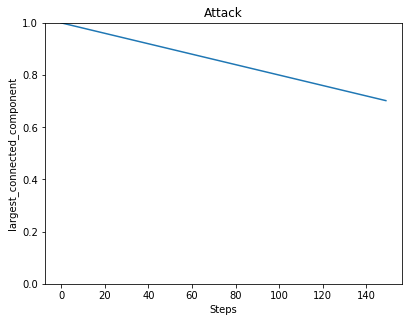

Opened graph_iter_38.gpickle ...
Attack parameters: {'runs': 1, 'steps': 450, 'seed': 1, 'attack': 'rnd_node', 'k_d': 0, 'defense': None, 'robust_measure': 'largest_connected_component', 'plot_transition': False, 'gif_animation': False, 'edge_style': 'bundled', 'node_style': 'force_atlas', 'fa_iter': 1000}
Attacking...
Running simulation 1 times
Done.
	Time needed for loading: 0.08 seconds
	Time needed for attacking: 0.80 minutes


<Figure size 432x288 with 0 Axes>

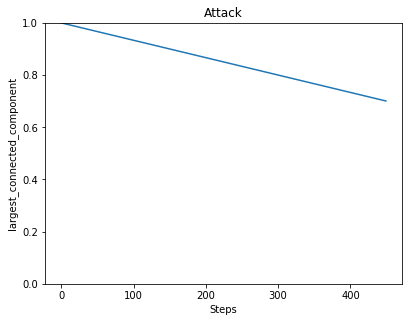

Opened graph_iter_36.gpickle ...
Attack parameters: {'runs': 1, 'steps': 750, 'seed': 1, 'attack': 'rnd_node', 'k_d': 0, 'defense': None, 'robust_measure': 'largest_connected_component', 'plot_transition': False, 'gif_animation': False, 'edge_style': 'bundled', 'node_style': 'force_atlas', 'fa_iter': 1000}
Attacking...
Running simulation 1 times
Done.
	Time needed for loading: 0.07 seconds
	Time needed for attacking: 2.91 minutes


<Figure size 432x288 with 0 Axes>

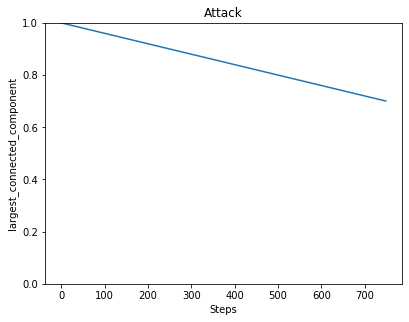

Opened graph_iter_34.gpickle ...
Attack parameters: {'runs': 1, 'steps': 1050, 'seed': 1, 'attack': 'rnd_node', 'k_d': 0, 'defense': None, 'robust_measure': 'largest_connected_component', 'plot_transition': False, 'gif_animation': False, 'edge_style': 'bundled', 'node_style': 'force_atlas', 'fa_iter': 1000}
Attacking...
Running simulation 1 times
Done.
	Time needed for loading: 0.14 seconds
	Time needed for attacking: 7.07 minutes


<Figure size 432x288 with 0 Axes>

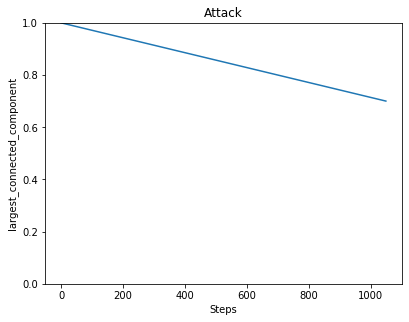

Opened graph_iter_32.gpickle ...
Attack parameters: {'runs': 1, 'steps': 1350, 'seed': 1, 'attack': 'rnd_node', 'k_d': 0, 'defense': None, 'robust_measure': 'largest_connected_component', 'plot_transition': False, 'gif_animation': False, 'edge_style': 'bundled', 'node_style': 'force_atlas', 'fa_iter': 1000}
Attacking...
Running simulation 1 times
Done.
	Time needed for loading: 0.18 seconds
	Time needed for attacking: 13.87 minutes


<Figure size 432x288 with 0 Axes>

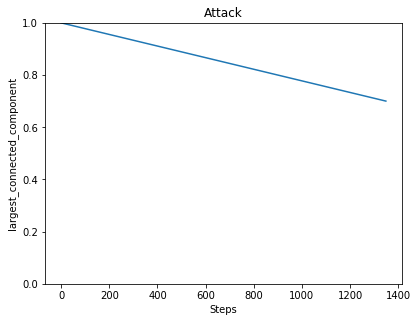

Opened graph_iter_30.gpickle ...
Attack parameters: {'runs': 1, 'steps': 1650, 'seed': 1, 'attack': 'rnd_node', 'k_d': 0, 'defense': None, 'robust_measure': 'largest_connected_component', 'plot_transition': False, 'gif_animation': False, 'edge_style': 'bundled', 'node_style': 'force_atlas', 'fa_iter': 1000}
Attacking...
Running simulation 1 times
Done.
	Time needed for loading: 0.21 seconds
	Time needed for attacking: 23.85 minutes


<Figure size 432x288 with 0 Axes>

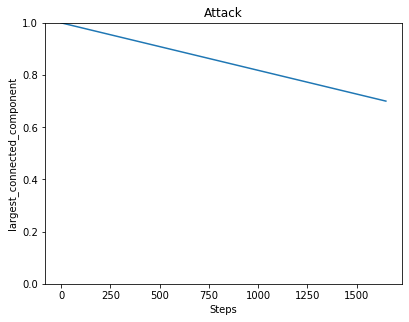

Opened graph_iter_28.gpickle ...
Attack parameters: {'runs': 1, 'steps': 1950, 'seed': 1, 'attack': 'rnd_node', 'k_d': 0, 'defense': None, 'robust_measure': 'largest_connected_component', 'plot_transition': False, 'gif_animation': False, 'edge_style': 'bundled', 'node_style': 'force_atlas', 'fa_iter': 1000}
Attacking...
Running simulation 1 times
Done.
	Time needed for loading: 0.25 seconds
	Time needed for attacking: 37.93 minutes


<Figure size 432x288 with 0 Axes>

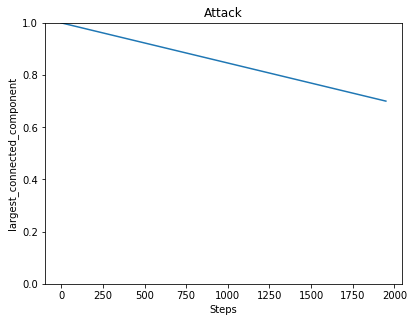

Opened graph_iter_26.gpickle ...
Attack parameters: {'runs': 1, 'steps': 2250, 'seed': 1, 'attack': 'rnd_node', 'k_d': 0, 'defense': None, 'robust_measure': 'largest_connected_component', 'plot_transition': False, 'gif_animation': False, 'edge_style': 'bundled', 'node_style': 'force_atlas', 'fa_iter': 1000}
Attacking...
Running simulation 1 times
Done.
	Time needed for loading: 0.29 seconds
	Time needed for attacking: 56.37 minutes


<Figure size 432x288 with 0 Axes>

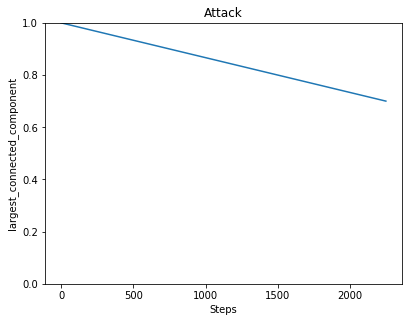

Opened graph_iter_24.gpickle ...
Attack parameters: {'runs': 1, 'steps': 2550, 'seed': 1, 'attack': 'rnd_node', 'k_d': 0, 'defense': None, 'robust_measure': 'largest_connected_component', 'plot_transition': False, 'gif_animation': False, 'edge_style': 'bundled', 'node_style': 'force_atlas', 'fa_iter': 1000}
Attacking...
Running simulation 1 times
Done.
	Time needed for loading: 0.61 seconds
	Time needed for attacking: 79.97 minutes


<Figure size 432x288 with 0 Axes>

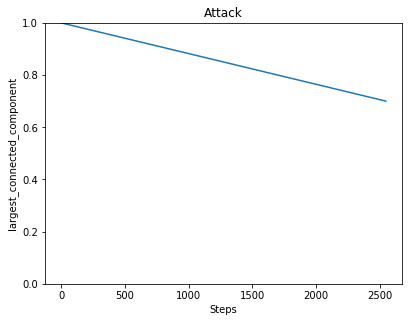

Opened graph_iter_22.gpickle ...
Attack parameters: {'runs': 1, 'steps': 2850, 'seed': 1, 'attack': 'rnd_node', 'k_d': 0, 'defense': None, 'robust_measure': 'largest_connected_component', 'plot_transition': False, 'gif_animation': False, 'edge_style': 'bundled', 'node_style': 'force_atlas', 'fa_iter': 1000}
Attacking...
Running simulation 1 times
Done.
	Time needed for loading: 0.43 seconds
	Time needed for attacking: 109.79 minutes


<Figure size 432x288 with 0 Axes>

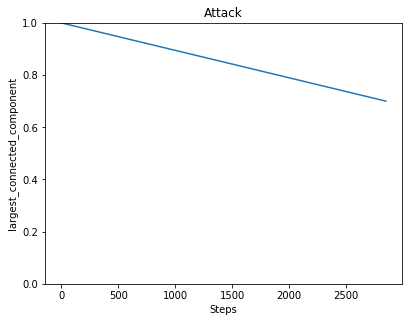

Opened graph_iter_20.gpickle ...
Attack parameters: {'runs': 1, 'steps': 3150, 'seed': 1, 'attack': 'rnd_node', 'k_d': 0, 'defense': None, 'robust_measure': 'largest_connected_component', 'plot_transition': False, 'gif_animation': False, 'edge_style': 'bundled', 'node_style': 'force_atlas', 'fa_iter': 1000}
Attacking...
Running simulation 1 times
Done.
	Time needed for loading: 0.51 seconds
	Time needed for attacking: 145.58 minutes


<Figure size 432x288 with 0 Axes>

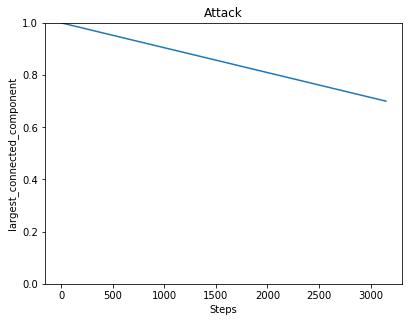

Opened graph_iter_18.gpickle ...
Attack parameters: {'runs': 1, 'steps': 3450, 'seed': 1, 'attack': 'rnd_node', 'k_d': 0, 'defense': None, 'robust_measure': 'largest_connected_component', 'plot_transition': False, 'gif_animation': False, 'edge_style': 'bundled', 'node_style': 'force_atlas', 'fa_iter': 1000}
Attacking...
Running simulation 1 times


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [6]:
for i in range(total_grains, 1, -2):

    start1 = time.time()

    with open(f"ns grainer/graph_iter_{i}.gpickle", 'rb') as pickle_file:
        graph = pickle.load(pickle_file)
    end1 = time.time()
    print(f"Opened graph_iter_{i}.gpickle ...")

    start2 = time.time()

    params = {
        # PARAMS
        'runs': 1,
        'steps': int(percentage * len(graph)),  # number of attack steps 
        'seed': 1,

        # ATTACK
        'attack': 'rnd_node',  # type (see above for description)
        # 'attack_approx': int(0.1*len(graph)), # attack approximation parameter (not available for every measure)

        # DEFENSE
        'k_d': 0,  # numbers of node to defend
        'defense': None,  # defense type

        # MEASURE
        'robust_measure': 'largest_connected_component',

        # PLOT
        'plot_transition': False,
        'gif_animation': False,

        'edge_style': 'bundled',  # 'curved' or 'bundled', or None for straight (?)
        'node_style': 'force_atlas',  # 'force_atlas' or 'spectral'
        'fa_iter': 1000,  # number of iterations for convergence of atlas2
        # bundled and force_atlas seem to yield best result
    }
    print(f"Attack parameters: {params}")

    atk = Attack(graph, **params)
    print("Attacking...")
    results = atk.run_simulation()
    print("Done.")
    end2 = time.time()

    print("\tTime needed for loading: {:.2f} seconds".format(end1-start1))
    print("\tTime needed for attacking: {:.2f} minutes".format((end2-start2)/60))

    atk.plot_results(results)

log for biggest net, random node removal:
    average distance: 5,17 minutes, not really informative
    diameter: 5, 16 minutes, not really informative